# **ANALISIS EXPLORATORIO DE DATOS (EDA)**

* ### **Dataset Barrio Churriana Málaga**

#### ***Lectura e inspección del dataset***

En esta sección realizaremos:<br>
* Análisis estadístico de los datos.
* Identificación de Nan numbers y limpieza.
* Exploración del conjunto de datos.
* Identificación de posibles Outliers y tratamiento.
* Preprocesamiento de variables categóricas a numéricas.
* Datos finales para trabajar en los modelos


Importamos las librerías necesarias

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [6]:
properties_churriana = pd.read_csv("data_scrapping/info-churriana-malaga.csv", index_col = 0)

In [7]:
properties_churriana.shape

(187, 18)

In [8]:
properties_churriana.head()

,titulo,localizacion,latitude,longitude,price,energy_certification,basic_characteristics,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,Chalet adosado en venta en Guadalmar,"Churriana, Málaga",36.666638,-4.464576,395000,inProcess,"{'roomNumber': '4', 'bathNumber': '3', 'hasPar...",4,3,1.0,1.0,1.0,1.0,NaN,194,0,0,1
1,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.663719,-4.503897,640000,inProcess,"{'roomNumber': '4', 'bathNumber': '2', 'hasPar...",4,2,1.0,1.0,1.0,1.0,NaN,310,0,0,1
2,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.656894,-4.502930,567000,inProcess,"{'roomNumber': '5', 'bathNumber': '4', 'hasPar...",5,4,1.0,1.0,0.0,1.0,NaN,410,0,0,1
3,"Ático en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,375900,unknown,"{'roomNumber': '4', 'bathNumber': '2', 'hasLif...",4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,"Piso en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,249900,unknown,"{'roomNumber': '2', 'bathNumber': '2', 'hasLif...",2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


In [9]:
properties_churriana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titulo                 187 non-null    object 
 1   localizacion           187 non-null    object 
 2   latitude               187 non-null    float64
 3   longitude              187 non-null    float64
 4   price                  187 non-null    int64  
 5   energy_certification   187 non-null    object 
 6   basic_characteristics  187 non-null    object 
 7   room_number            187 non-null    int64  
 8   bath_number            187 non-null    int64  
 9   has_garden             164 non-null    float64
 10  has_terrace            170 non-null    float64
 11  has_parking            169 non-null    float64
 12  has_swimmingpool       158 non-null    float64
 13  has_lift               81 non-null     float64
 14  constructed_area       187 non-null    int64  
 15  is_new

In [10]:
properties_churriana.dtypes

titulo                    object
localizacion              object
latitude                 float64
longitude                float64
price                      int64
energy_certification      object
basic_characteristics     object
room_number                int64
bath_number                int64
has_garden               float64
has_terrace              float64
has_parking              float64
has_swimmingpool         float64
has_lift                 float64
constructed_area           int64
is_new_development         int64
is_needs_renovating        int64
is_goog_condition          int64
dtype: object

In [11]:
properties_churriana.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,187.0,36.692094,0.113276,36.610730,36.659499,36.663815,36.671115,3.714505e+01
longitude,187.0,-4.449519,0.202287,-4.686328,-4.506868,-4.501821,-4.490153,-3.641632e+00
price,187.0,482993.689840,512781.940307,54900.000000,249900.000000,299990.000000,567000.000000,5.000000e+06
room_number,187.0,3.625668,1.629362,1.000000,3.000000,3.000000,4.000000,1.400000e+01
bath_number,187.0,2.556150,1.395385,1.000000,2.000000,2.000000,3.000000,8.000000e+00
has_garden,164.0,0.695122,0.461766,0.000000,0.000000,1.000000,1.000000,1.000000e+00
has_terrace,170.0,0.947059,0.224578,0.000000,1.000000,1.000000,1.000000,1.000000e+00
has_parking,169.0,0.899408,0.301681,0.000000,1.000000,1.000000,1.000000,1.000000e+00
has_swimmingpool,158.0,0.867089,0.340558,0.000000,1.000000,1.000000,1.000000,1.000000e+00
has_lift,81.0,0.975309,0.156150,0.000000,1.000000,1.000000,1.000000,1.000000e+00


#### **Limpieza de datos**

En primer lugar **eliminamos la columna basic_characteristics** ya que esta contiene un diccionario con todas las características de cada inmueble, las cuales ya están representadas en sus respectivas columnas.

In [12]:
properties_churriana = properties_churriana.drop(['basic_characteristics'], axis = 1)

**Obtenemos el volumen de Nan numbers por columna.**<br>
En este caso, al generar el dataset con web scraping, si el inmueble no contiene una de las características a recabar, por defecto se rellena el campo con el valor None. <br>
Procedemos a identificar cuantos casos existen en el conjunto y pasaremos dichos valores None a valor 0 (no tienen esa característica). Por ejemplo con has_swimmingpool significaría que la vivienda no dispone de piscina).

In [13]:
properties_churriana.isnull().sum(axis = 0)

titulo                    0
localizacion              0
latitude                  0
longitude                 0
price                     0
energy_certification      0
room_number               0
bath_number               0
has_garden               23
has_terrace              17
has_parking              18
has_swimmingpool         29
has_lift                106
constructed_area          0
is_new_development        0
is_needs_renovating       0
is_goog_condition         0
dtype: int64

In [14]:
Nan_numbers = properties_churriana.isnull().sum(axis = 0).sum()

print(f"Se encuentran {Nan_numbers} Nan numbers")

Se encuentran 193 Nan numbers


**Pasamos todos los Nan a 0**

In [15]:
properties_churriana = properties_churriana.fillna(0)

**Guardamos el dataset limpio sin valores Nan**

In [16]:
properties_churriana.to_csv('clean_properties_churriana.csv')

#### **EXPLORACIÓN**

Para la exploración de los datos cargamos los datos limpios de valorer None.

In [17]:
data_clean = pd.read_csv('clean_properties_churriana.csv', index_col = 0)

Partiremos con la visualizacion de los histogramas de las diferentes características de las viviendas. En la gráfica se observa que price y constructed_area presentan skew positivo, es decir, hay algunas viviendas que poseen mayores precios y metros cuadrados que el resto y esto hace que la gráfica presente una cola hacia la derecha. <br>
Esta información será util para determinar que variables serán transformadas para que su distribucion se ajuste a la de la normal y, tal vez, ayude a mejorar los resultados de la predicción.
Analizaremos posibles outliers en las distintas variables.

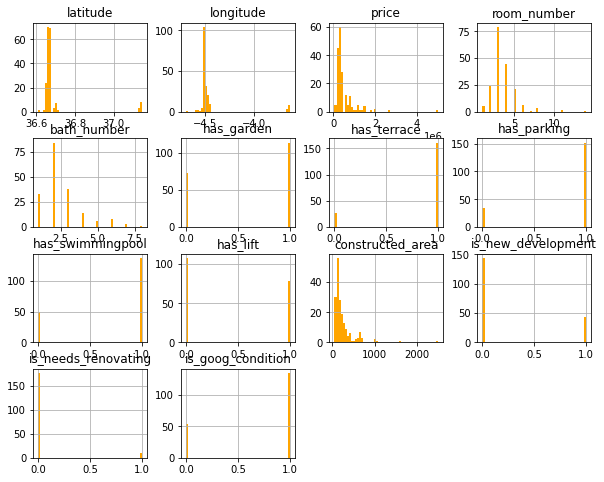

In [18]:
data_clean.hist(bins=50, figsize=(10, 8), color='orange')
plt.savefig("histogramas.png")

Hacemos un **gráfico heatmap** para estudiar las correlaciones de la variable a predecir "price" con el resto del conjunto. Ver cuales presentan las correlaciones más altas y las más bajas y si son positivas o negativas. Esto nos ayuda a identificar que variables son más relevantes para el modelo predictivo.

* Las variables constructed_area, room_number, bath_number son las que mayor relación positivan tienen con respecto a la variable precio. has_lift y is_need_renovating presentan una relación negativa.<br>

* Para el modelo valoraremos la exclusión de la variable is_need_renovating ya que ya disponemos de la informción is_good_condition que ya nos está indicando si está en buenas condiciones.

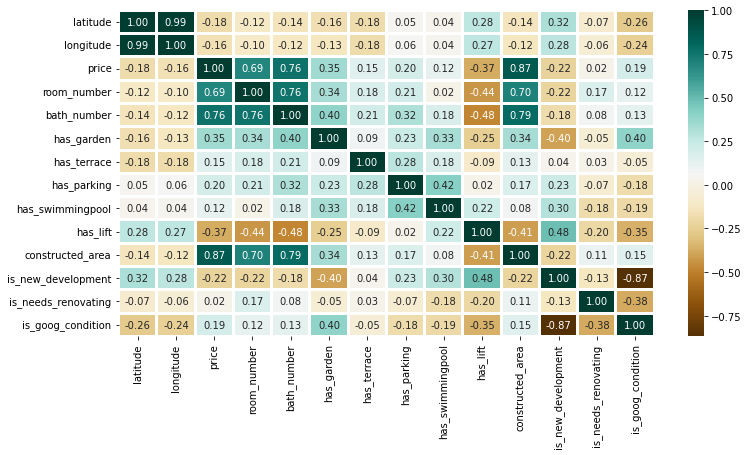

In [22]:
plt.figure(figsize=(12, 6))
sb.heatmap(data_clean.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

plt.savefig("heatmap.png")

Analizamos nuevamente como se comporta la variable precio con respecto a las variables con mayor correlación a través de un gŕafico de dispersión. 
* Presenta una correlación lineal. A mayor cantidad de metros construidos, habitaciones y baños mayor precio.
* Podemos observar algunos valores extremos en precio y en metros construidos.

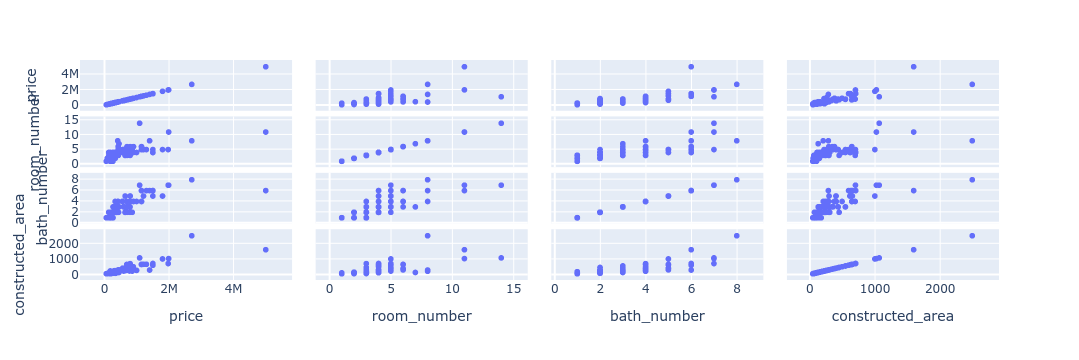

In [23]:
fig = px.scatter_matrix(data_clean,
                       dimensions= ['price', 'room_number', 'bath_number', 'constructed_area']
                    
                       )
fig.show()


**Exploración de posibles outliers** <br>
Realizamos diferentes análisis para identificar estos valores "Outliers" y estudiar si se debe a valores atípicos que pueden afectar a nuestro modelo o si se debe a valores extremos y por tanto valorar si son o no excluidos del conjunto ya que pueden aportar información relevante para el aprendizaje del modelo.

In [24]:
data_selected_columns = data_clean[["price", "room_number", "bath_number", "constructed_area"]]

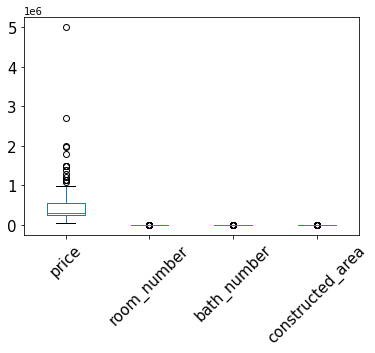

In [25]:
data_selected_columns.boxplot(grid=False, rot=45, fontsize=15)

plt.show()

En el gráfico de cajas y bigotes se observa como el precio presenta valores atípicos.

**Analizamos la distribución de la variable precio:**
* La distribución de los datos de ajustan a una curva sesgada a la derecha. <br>

/home/dsc/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



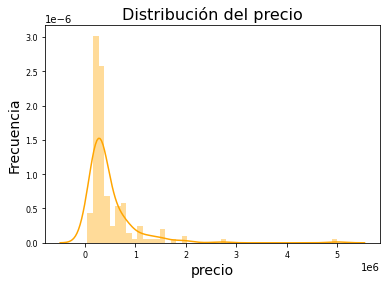

In [26]:
sb.distplot(data_clean['price'], color = 'orange')
plt.title('Distribución del precio', fontsize = 16)
plt.xlabel('precio', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('distplot_price.png')
plt.show()

Dibujaremos la **gráfica en escala logarítmica** para analizar mejor el conjunto.

/home/dsc/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



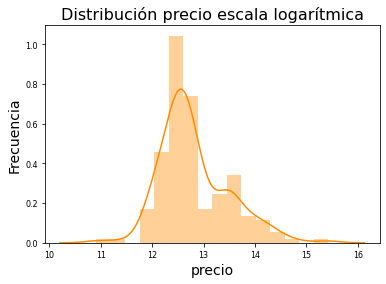

In [27]:
sb.distplot(np.log(data_clean['price']), color = 'darkorange')
plt.title('Distribución precio escala logarítmica', fontsize = 16)
plt.xlabel('precio', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('distplot_precio_log.png')
plt.show()


**Analizamos la distribución de los metros contruidos.**
* Podemos ver que es una distribución con **skew positivo**. Sesgada a la derecha.

/home/dsc/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



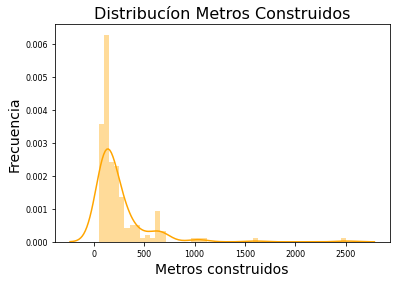

In [28]:
sb.distplot(data_clean['constructed_area'], color = 'orange')
plt.title('Distribucíon Metros Construidos', fontsize = 16)
plt.xlabel('Metros construidos', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('distplot_metros construidos.png')
plt.show()

/home/dsc/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



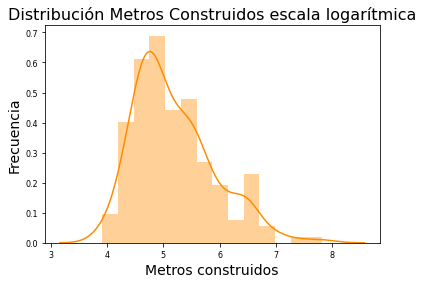

In [29]:
sb.distplot(np.log(data_clean['constructed_area']), color = 'darkorange')
plt.title('Distribución Metros Construidos escala logarítmica', fontsize = 16)
plt.xlabel('Metros construidos', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('distplot_constructed_area_log.png')
plt.show()

Analizamos el **volumen de viviendas según el número de habitaciones**. <br>
* La mayoría de las viviendas presenta **3 y 4 habitaciones**. 
* Podemos observar que hay alguna vivienda con 14 y 11 habitaciones. Un comportamiento atípico que podría sesgar los datos y afectar al modelo.

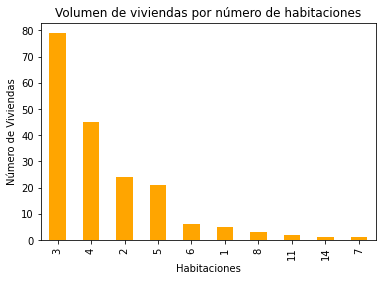

In [30]:
data_clean['room_number'].value_counts().plot(kind='bar', color='orange')
plt.title('Volumen de viviendas por número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Número de Viviendas')
sb.despine

plt.savefig("numero_de_habitaciones.jpg")

Analizamos el **volumen de viviendas según el número de baños**. <br>


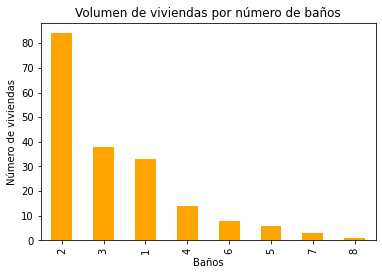

In [31]:
data_clean['bath_number'].value_counts().plot(kind='bar', color='orange')
plt.title('Volumen de viviendas por número de baños')
plt.xlabel('Baños')
plt.ylabel('Número de viviendas')
sb.despine

plt.savefig("numero_de_baños.jpg")

Analizamos la **relación del precio con el número de habitaciones y el número de baños.**
* Se observan algunos Outlier en función del precio en viviendas de dos baños y en viviendas con 6 baños, el precio de esta es de 5 millones.
* En Viviendas de 3,4 y 5 habitaciones también se observan Outliers.

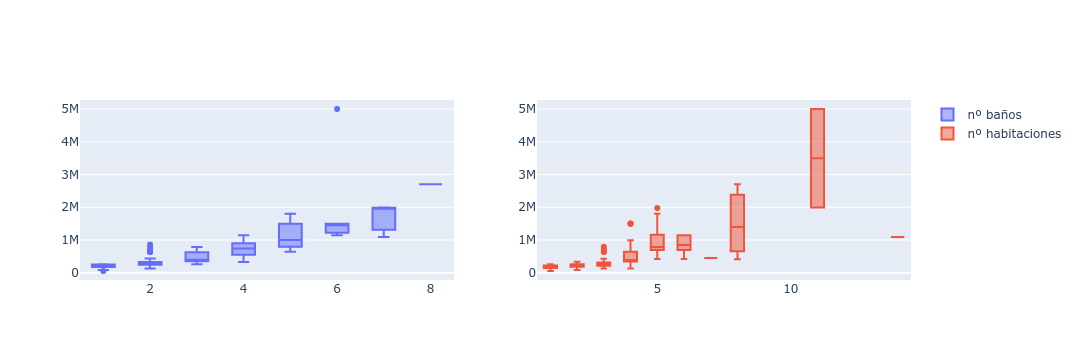

In [64]:
fig2 = make_subplots(rows=1,cols=2)
fig2.add_box(x=data_clean['bath_number'],y=data_clean['price'],row=1,col=1,name='nº baños')
fig2.add_box(x=data_clean['room_number'],y=data_clean['price'],row=1,col=2,name='nº habitaciones')
fig2.show()

Analizamos la **relación entre el precio y los metros contruidos.**

Text(0.5, 1.0, 'Price vs Constructe area')

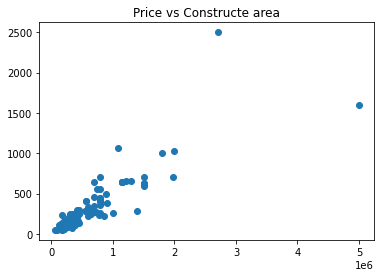

In [33]:
plt.scatter(data_clean.price,data_clean.constructed_area)
plt.title("Price vs Constructe area")

**Análisis del precio en función del número de habitaciones** <br>
* Podemos afirmar que los valores extremos de precio identificados en el estudio corresponden con viviendas que presentan un gran número de habitaciones.
* Esto es algo normal y podemos decir que los datos no son atípicos sino que son valores extremos. A pesar de afirmar esto, identificaremos estos puntos para guardar un nuevo dataset con estos valores excluidos.
* Posteriormente entrenaremos los modelos tanto con todo el conjunto de datos como con el dataset sin outliers para quedarnos con el que mejor rendimiento aporte al modelo de predicción. <br><br>

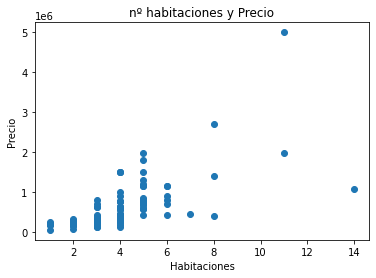

In [34]:
plt.scatter(data_clean.room_number,data_clean.price)
plt.title("nº habitaciones y Precio")
plt.xlabel("Habitaciones")
plt.ylabel("Precio")
plt.show()

Realizamos algunos **análisis adicionales en función del resto de características** de la base de datos:
* Relación del precio con piscina.
* Relación del precio con jardín.
* Relación del precio con si es nueva construcción.
* Relación del precio cn si está en buenas condiciones.
* Relación del precio con si necesita reforma.
* Relación del precio con si tiene terraza.


Las viviendas con estas características a excepción de si es nueva construcción presentan precios más elevados.

Text(0.5, 1.0, 'Piscina  vs Precio ( 1= Con piscina)')

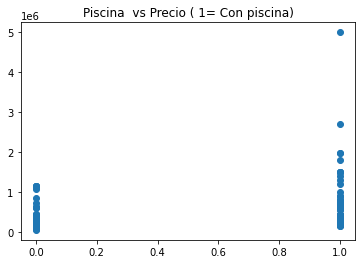

In [35]:
plt.scatter(data_clean.has_swimmingpool,data_clean.price)
plt.title("Piscina  vs Precio ( 1= Con piscina)")

Text(0.5, 1.0, 'Jardín  vs Precio ( 1= Con jardín)')

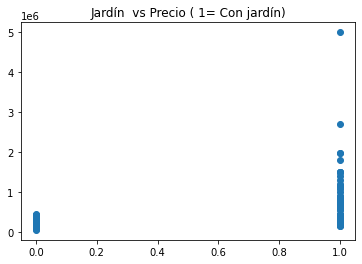

In [36]:
plt.scatter(data_clean.has_garden,data_clean.price)
plt.title("Jardín  vs Precio ( 1= Con jardín)")

Text(0.5, 1.0, 'Nueva Construcción  vs Precio ( 1= Es de Nueva Construcción)')

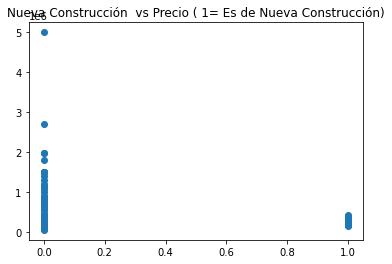

In [37]:
plt.scatter(data_clean.is_new_development,data_clean.price)
plt.title("Nueva Construcción  vs Precio ( 1= Es de Nueva Construcción)")

Text(0.5, 1.0, 'En Buenas Condiciones  vs Precio ( 1= En Buenas Condiciones)')

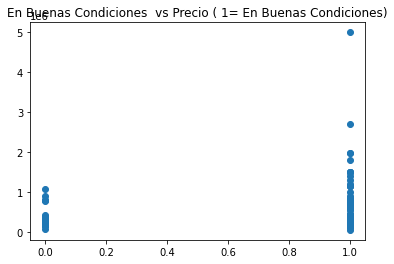

In [38]:
plt.scatter(data_clean.is_goog_condition,data_clean.price)
plt.title("En Buenas Condiciones  vs Precio ( 1= En Buenas Condiciones)")

Text(0.5, 1.0, 'Terraza  vs Precio ( 1= Tiene Terraza)')

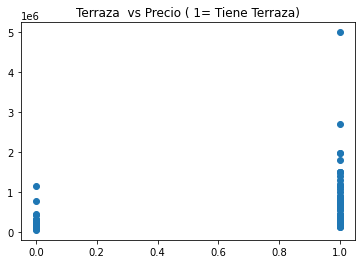

In [39]:
plt.scatter(data_clean.has_terrace,data_clean.price)
plt.title("Terraza  vs Precio ( 1= Tiene Terraza)")

In [40]:
data_clean["has_swimmingpool"].value_counts()[1]

137

In [41]:
data_clean["has_garden"].value_counts()[1]

114

In [42]:
data_clean["is_new_development"].value_counts()[1]

43

In [43]:
data_clean["is_needs_renovating"].value_counts()[1]

10

En Churriana la gran mayoría de viviendas a la venta tienen piscina, y una gran parte de ellas jardín. Además casi todas están en buenas condiciones, tan solo 10 de 186 necesitan reforma.

**Cálculo de Outliers** <br>
Calculamos los cuartiles 1 y 3 para poder calcular el valor intercuartílico **"IQR"** y así obtener el límite inferior y el límite superior para la exclusión de las viviendas que estén fuera de estos límites.

In [44]:
q1 = np.percentile(data_clean["price"], 25)
q3 = np.percentile(data_clean["price"], 75)

In [45]:
iqr = q3 - q1

# calculamos los límites inferior y superior del precio
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(f"Todas las viviendas con precios superiores a: {upper_limit}€ serán excluidas")
print(f"Todas las viviendas con precios inferiores a: {lower_limit}€ serán excluidas")


Todas las viviendas con precios superiores a: 1042650.0€ serán excluidas
Todas las viviendas con precios inferiores a: -225750.0€ serán excluidas


Vemos **cuántas viviendas estaríamos excluyendo del conjunto con precios superiores al límite superior**. No calculamos el inferior ya que da una cantidad negativa por lo que no hay ningún dato que calcular ni excluir.

In [46]:
data_outliers = data_clean[data_clean["price"] > upper_limit].shape[0]


print(f"Excluiríamos {data_outliers} viviendas")

Excluiríamos 17 viviendas


Vemos los 25 primeros valores del dataset ordenados por los precios más altos para tener una visión de los datos a excluir.

In [47]:
properties_churriana.sort_values(by='price',ascending=False).head(25)
                                                        

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
72,Casa o chalet independiente en venta en Churri...,"Churriana, Málaga",36.663815,-4.505882,5000000,c,11,6,1.0,1.0,1.0,1.0,0.0,1600,0,0,1
28,Casa o chalet independiente en venta en calle ...,"Pinos de Alhaurín, Alhaurín de la Torre",36.658921,-4.578677,2706000,f,8,8,1.0,1.0,1.0,1.0,0.0,2500,0,0,1
152,Casa o chalet independiente en venta en Urb. E...,"Churriana, Málaga",36.654915,-4.491654,1990000,c,11,7,1.0,1.0,1.0,1.0,0.0,1028,0,0,1
104,Casa o chalet independiente en venta en Urb. E...,"Churriana, Málaga",36.650969,-4.493461,1975000,d,5,7,1.0,1.0,1.0,1.0,0.0,706,0,0,1
171,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.645745,-4.501694,1800000,d,5,5,1.0,1.0,1.0,1.0,0.0,1004,0,0,1
60,Casa o chalet independiente en venta en calle ...,"Guadalmar, Málaga",36.667578,-4.462350,1500000,d,5,6,1.0,1.0,1.0,1.0,0.0,600,0,0,1
74,Casa o chalet independiente en venta en calle ...,"Guadalmar, Málaga",36.667478,-4.460549,1500000,c,4,5,1.0,1.0,1.0,1.0,0.0,620,0,0,1
91,Casa o chalet independiente en venta en Urb. G...,"Churriana, Málaga",36.665476,-4.461655,1500000,c,4,6,1.0,1.0,1.0,1.0,0.0,710,0,0,1
89,Casa o chalet independiente en venta en Guadalmar,"Churriana, Málaga",36.664578,-4.460050,1500000,inProcess,4,6,1.0,1.0,1.0,1.0,0.0,630,0,0,1
17,Casa o chalet independiente en venta en carril...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.652227,-4.489694,1399000,e,8,6,1.0,1.0,1.0,1.0,0.0,290,0,0,1


Generamos un nuevo conjunto de datos con la exclusión de los outliers. Lo guardamos en csv y posteriormente lo usaremos en los modelos.

In [48]:
data_without_outliers = data_clean[data_clean["price"] <= upper_limit]

In [49]:
data_without_outliers.head()

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,Chalet adosado en venta en Guadalmar,"Churriana, Málaga",36.666638,-4.464576,395000,inProcess,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.663719,-4.503897,640000,inProcess,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.656894,-4.502930,567000,inProcess,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,"Ático en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,375900,unknown,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,"Piso en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,249900,unknown,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


In [50]:
data_without_outliers.to_csv('clean_properties_churriana_without_outliers.csv')

In [51]:
data_clean.describe()

,latitude,longitude,price,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
count,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,36.692094,-4.449519,4.829937e+05,3.625668,2.556150,0.609626,0.860963,0.812834,0.73262,0.422460,243.433155,0.229947,0.053476,0.716578
std,0.113276,0.202287,5.127819e+05,1.629362,1.395385,0.489144,0.346914,0.391092,0.44378,0.495277,270.325987,0.421928,0.225585,0.451870
min,36.610730,-4.686328,5.490000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,36.659499,-4.506868,2.499000e+05,3.000000,2.000000,0.000000,1.000000,1.000000,0.00000,0.000000,108.500000,0.000000,0.000000,0.000000
50%,36.663815,-4.501821,2.999900e+05,3.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000,152.000000,0.000000,0.000000,1.000000
75%,36.671115,-4.490153,5.670000e+05,4.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,256.000000,0.000000,0.000000,1.000000
max,37.145055,-3.641632,5.000000e+06,14.000000,8.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2500.000000,1.000000,1.000000,1.000000


In [52]:
data_without_outliers.describe()

,latitude,longitude,price,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,36.695409,-4.444952,360341.294118,3.335294,2.223529,0.570588,0.852941,0.800000,0.735294,0.464706,181.441176,0.252941,0.052941,0.694118
std,0.118307,0.211501,195575.256634,1.087553,0.902022,0.496455,0.355211,0.401182,0.442480,0.500226,115.866530,0.435982,0.224578,0.462141
min,36.610730,-4.686328,54900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,36.659824,-4.507887,246975.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,105.250000,0.000000,0.000000,0.000000
50%,36.664441,-4.501821,297100.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,141.500000,0.000000,0.000000,1.000000
75%,36.671190,-4.490806,395000.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,231.000000,0.750000,0.000000,1.000000
max,37.145055,-3.641632,995000.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,702.000000,1.000000,1.000000,1.000000


### **Preprocesamiento de variables categóricas**

Analizamos el tipo de variables del conjunto. Se identifcian 3 variables catgóricas.

In [53]:
#tipo de variables

obj = (data_clean.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data_clean.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data_clean.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 7
Float variables: 7


Las variables categóricas obtenidas son: Título, Localización y Certificación energética. <br>
* La variable título no va a ser usada en el modelo. La misma presenta valores diferentes en todas las viviendas ya que cada propietario pone el título que desea para promocionar su viviendas en el portal.
* LA variable Localización no va a ser unasada tampoco en el modelo. La zona de estudio es Churriana por lo que no aporta valores significativos, además disponemos de las columnas latitud y longitud que ya marcan un punto en el mapa con lo que ya se estáría teniendo en cuenta la localización en el modelo.
* Para la variable certificación energética se realzia un preprocesamiento de datos para trasformar los valores categóricos en númericos. Para ello usaremos Label Encoder.

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

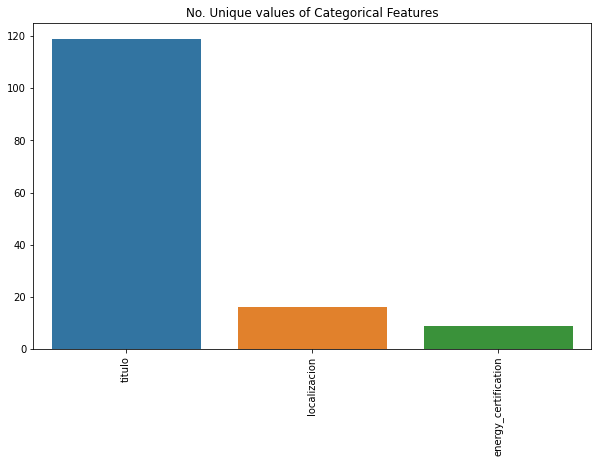

In [56]:
unique_values = []
for col in object_cols:
  unique_values.append(data_clean[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sb.barplot(x=object_cols,y=unique_values)

**Data Engineer - energy_certification** <br>
Trasformamos las variables categóricas a numéricas. Usamos LAbelEncoder para ello asignando un valor único para cada valor categórico en cada una de las variables. Guardamos el dataset en formato csv.

In [57]:
#importamos librería
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_clean.localizacion= le.fit_transform(data_clean.localizacion.values)
data_clean.titulo= le.fit_transform(data_clean.titulo.values)
data_clean.energy_certification= le.fit_transform(data_clean.energy_certification.values)
                                                  

In [58]:
data_clean

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,49,3,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,35,4,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,29,5,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,114,4,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,97,4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,66,4,36.669872,-4.519457,320000,1,3,3,1.0,1.0,1.0,1.0,0.0,140,0,0,1
183,62,5,36.661758,-4.504469,595000,4,4,3,1.0,1.0,1.0,0.0,0.0,226,0,0,1
184,37,4,36.664690,-4.519482,640000,8,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
185,82,4,36.661137,-4.519971,367500,7,3,2,1.0,1.0,1.0,1.0,0.0,123,0,0,1


In [59]:
data_clean.to_csv('data_model_churriana_malaga.csv')